In [5]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### The Titanic dataset

Source: https://www.kaggle.com/francksylla/titanic-machine-learning-from-disaster

Read the dataframe into a variable called titanic

In [6]:
titanic = pd.read_csv('../Titanic_exploration/data/train.csv')

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Drop the 'Cabin' from the dataset. 

We'll deal with them later. The problem with Cabin is it has a lot of missing values. We will first want a fast result and maybe we can bring Cabin back later.

In [34]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [35]:
titanic.drop(columns='Cabin', inplace=True)

KeyError: "['Cabin'] not found in axis"

# Count the number of missing on the dataset

In [36]:
(titanic.isnull()).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [37]:
(titanic.isna()).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

We'll drop all the missing values for now. In this way, you will be able to compare the effects of just dropping the missing values and inputting them.

In [38]:
titanic.shape

(891, 11)

In [39]:
tita = titanic.dropna().copy()

Check how much data we've dropped. And check the number of missings in the dataset again just to check if you droped it correctly.

In [40]:
(tita.isna()).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Use .describe() on the resulting dataset to check some patterns on the numerical columns

In [41]:
tita.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


What can you conclude from that? Check for example the average of survivals, the minimum and maximum Ages.

# Check the dataset with a .head()

In [42]:
tita.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Visualizing relationships

Try to use a scatterplot on the dataframe columns 'Age' vs 'Survived' to see if you can have some insights

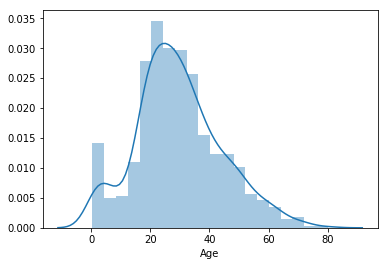

In [43]:
sns.distplot(tita.Age);

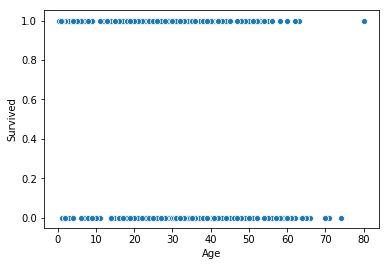

In [44]:
sns.scatterplot(x = tita.Age, y = tita.Survived);

Now do the same for the columns 'Fare' and 'Survived'

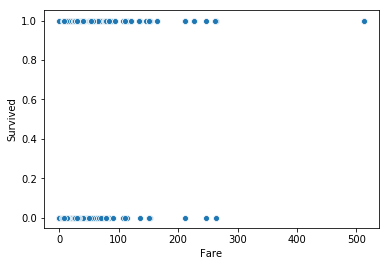

In [45]:
sns.scatterplot(x = tita.Fare, y = tita.Survived);

# pd.crosstab()

Sometimes the plots above can reveal some important insights - specially if you have used some kind of, however, a better way to obtain these insights would be to use the pd.crosstab() function. Use it to obtain a table using the columns 'Sex' and 'Survived'

In [46]:
pd.crosstab(tita.Sex,tita.Survived)

Survived,0,1
Sex,,
female,64,195
male,360,93


Now perform the same operation for 'Pclass' and 'Survived'

In [47]:
pd.crosstab(tita.Pclass, tita.Survived)

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [48]:
pd.qcut(tita.Age, 4, labels=['NOVO','ADOLESCENTE','ADULTO','IDOSO'])


0      ADOLESCENTE
1           ADULTO
2      ADOLESCENTE
3           ADULTO
4           ADULTO
6            IDOSO
7             NOVO
8      ADOLESCENTE
9             NOVO
10            NOVO
11           IDOSO
12            NOVO
13           IDOSO
14            NOVO
15           IDOSO
16            NOVO
18          ADULTO
20          ADULTO
21          ADULTO
22            NOVO
23     ADOLESCENTE
24            NOVO
25          ADULTO
27            NOVO
30           IDOSO
33           IDOSO
34     ADOLESCENTE
35           IDOSO
37     ADOLESCENTE
38            NOVO
          ...     
856          IDOSO
857          IDOSO
858    ADOLESCENTE
860          IDOSO
861    ADOLESCENTE
862          IDOSO
864    ADOLESCENTE
865          IDOSO
866    ADOLESCENTE
867         ADULTO
869           NOVO
870    ADOLESCENTE
871          IDOSO
872         ADULTO
873          IDOSO
874    ADOLESCENTE
875           NOVO
876           NOVO
877           NOVO
879          IDOSO
880    ADOLESCENTE
881         

What can you infer from that?

# Correlations

Can you infer the same using a correlation table and a heatmap?

1. Correlation dataframe


2. Correlation Heatmap

In [49]:
tita.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


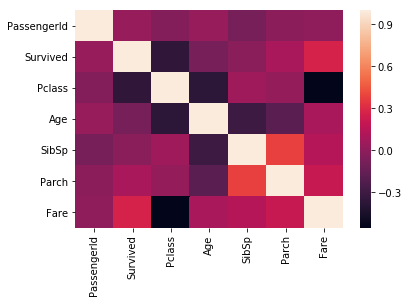

In [50]:
sns.heatmap(tita.corr())

Do you think age is linearly related to the variable Survived? Do you think this variable will be important in our models?

# Plot the distribution of the Age variable for each group (Survived == 1 and Survived == 0) in the same plot. 

Text(0.5, 1.0, 'Dead')

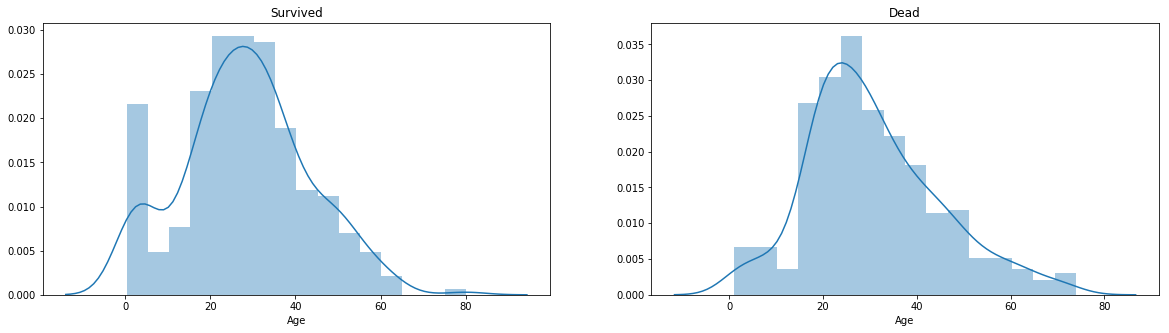

In [51]:
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.distplot(tita[tita.Survived==1].Age, ax=ax[0]).set_title('Survived')
sns.distplot(tita[tita.Survived==0].Age, ax=ax[1]).set_title('Dead')

# Now try to plot the same distribution, but now break the group into 
1. Survived, less than 18 years old male 
2. NOT Survived, less than 18 years old male 

And plot their Age distributions in the same graph.

_hint: use `titanic.query('Survived == 1 and Sex == "male" and Age < 18')` to filter the dataset for the first group_

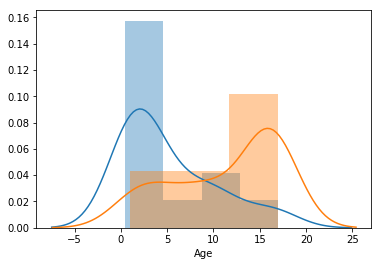

In [52]:
sns.distplot(titanic.query('Survived == 1 and Sex == "male" and Age < 18').Age)
sns.distplot(titanic.query('Survived == 0 and Sex == "male" and Age < 18').Age)

Do you understand this graph? What can you conclude about the variable Age? Is it important now? How does this relate Age's linear correlation value? 

# For these groups above, calculate their average of survivalness.

You probably observed a discrimination of Surivavalness around 9 years old. For this exercise, you need to calculate the chances for each of these groups to survive. Again, filter the dataset into two subgroups:
1. Males with ages less than 9
2. Males with ages greater than 9 and less than 18

What are their chances of surviving?

_hint: Now separate the titanic dataframe into a filter of `'Sex == "male" and Age >= 9 and Age < 18'` and calculate the mean of the Survived variable. Then do the same for the complementary group._ 

In [53]:
print(titanic.query('Sex == "male" and Age < 9').Survived.mean())
print(titanic.query('Sex == "male" and Age >= 9 and Age < 18').Survived.mean())

0.6071428571428571
0.2


# Building our first model

### Let's start simple. 

First create a variable named X containing only the variables `['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']`. This will be a pandas dataframe as the one below.


In [54]:
X = tita[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

Also create a pandas series containing the variable Survived. Store it in the variable `y`.

In [55]:
y = tita.Survived

# Try to train the model below

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

/home/rob/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Q'

What happened? Why didn't it work?

# Use `pd.get_dummies(X, columns=['Sex'])` on your X variable to create a new column containing the string information as a binary flag.

After using it, store it in the X variable again. You'll see that the variable Sex is gone and two other replaced it. 

In [57]:
Xnew = pd.get_dummies(X,columns=['Sex'])

# Plot the correlation matrix and see what you can infer from the correlation between these two new columns

Do you think both are necessary? 

In [58]:
Xnew.corr()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
Pclass,1.000000,-0.365902,0.065187,0.023666,-0.552893,-0.150826,0.150826
Age,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.099037,0.099037
SibSp,0.065187,-0.307351,1.000000,0.383338,0.139860,0.106296,-0.106296
Parch,0.023666,-0.187896,0.383338,1.000000,0.206624,0.249543,-0.249543
Fare,-0.552893,0.093143,0.139860,0.206624,1.000000,0.182457,-0.182457
Sex_female,-0.150826,-0.099037,0.106296,0.249543,0.182457,1.000000,-1.000000
Sex_male,0.150826,0.099037,-0.106296,-0.249543,-0.182457,-1.000000,1.000000


If not, drop one of them. 

In [59]:
Xnew.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,S,0,1
1,1,38.0,1,0,71.2833,C,1,0
2,3,26.0,0,0,7.9250,S,1,0
3,1,35.0,1,0,53.1000,S,1,0
4,3,35.0,0,0,8.0500,S,0,1


In [60]:
Xnew.drop(columns='Sex_female', inplace=True)

# Do the same analysis for the Embarked column
#### C = Cherbourg,  Q = Queenstown,  S = Southampton


In [61]:
Xnew.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,3,22.0,1,0,7.2500,S,1
1,1,38.0,1,0,71.2833,C,0
2,3,26.0,0,0,7.9250,S,0
3,1,35.0,1,0,53.1000,S,0
4,3,35.0,0,0,8.0500,S,1


In [62]:
Xnew = pd.get_dummies(Xnew,columns=['Embarked'])

Do you need to drop some?

In [63]:
Xnew.drop(columns='Embarked_S', inplace=True)

In [64]:
Xnew.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,3,22.0,1,0,7.2500,1,0,0
1,1,38.0,1,0,71.2833,0,1,0
2,3,26.0,0,0,7.9250,0,0,0
3,1,35.0,1,0,53.1000,0,0,0
4,3,35.0,0,0,8.0500,1,0,0


# If you managed to get here. You'll be able to concat the X and y variables again with the following code. 

In [65]:
titanic_processed = pd.concat([Xnew, y], axis=1)
titanic_processed

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Survived
0,3,22.0,1,0,7.2500,1,0,0,0
1,1,38.0,1,0,71.2833,0,1,0,1
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,0
6,1,54.0,0,0,51.8625,1,0,0,0
7,3,2.0,3,1,21.0750,1,0,0,0
8,3,27.0,0,2,11.1333,0,0,0,1
9,2,14.0,1,0,30.0708,0,1,0,1
10,3,4.0,1,1,16.7000,0,0,0,1


# And store it on your own folder.

In [66]:
titanic_processed.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Survived
0,3,22.0,1,0,7.2500,1,0,0,0
1,1,38.0,1,0,71.2833,0,1,0,1
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,0


In [67]:
titanic_processed.to_csv('titanic_processed.csv', index=False)

In [68]:
Xnew

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,3,22.0,1,0,7.2500,1,0,0
1,1,38.0,1,0,71.2833,0,1,0
2,3,26.0,0,0,7.9250,0,0,0
3,1,35.0,1,0,53.1000,0,0,0
4,3,35.0,0,0,8.0500,1,0,0
6,1,54.0,0,0,51.8625,1,0,0
7,3,2.0,3,1,21.0750,1,0,0
8,3,27.0,0,2,11.1333,0,0,0
9,2,14.0,1,0,30.0708,0,1,0
10,3,4.0,1,1,16.7000,0,0,0


In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Xnew, y)

/home/rob/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
test = pd.read_csv('../Titanic_exploration/data/test.csv')

In [71]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
Xnew.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,3,22.0,1,0,7.2500,1,0,0
1,1,38.0,1,0,71.2833,0,1,0
2,3,26.0,0,0,7.9250,0,0,0
3,1,35.0,1,0,53.1000,0,0,0
4,3,35.0,0,0,8.0500,1,0,0
